In [1]:
import plotly
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import pickle



import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import pickle
import geopandas as gpd

import nltk
from nltk.corpus import stopwords
import re

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import multiprocessing 
from multiprocessing import Pool

In [2]:
#Load tweets on a specific topic with sub-topics assigned (here - municipal tweets)
with open('kp_municipal_tweets_categorized.pickle', "rb") as f:
    tweets = pickle.load(f)

In [91]:
#Loat entire KP tweet dataset
with open('FINAL_KP_TWEETS_WITH_TOPICS_SENTIMENTS.pickle', "rb") as f:
    total_tweets = pickle.load(f)

In [94]:
#Create a total tweet count series over time starting in 2018
total_tweets["total_count"] = 1
total_tweets_count = total_tweets[["index", "total_count"]]
total_tweets_count = total_tweets_count.set_index("index")
total_tweets_count = total_tweets_count.resample("M").count()
total_tweets_count = total_tweets_count["2018-01-05":"2020-03-05"]

In [3]:
#Display max columns
pd.options.display.max_columns = None

In [4]:
#Recategorize any topics that would make better sense in other categories
tweets.loc[tweets.category == "economy", 'category'] = "development"
tweets.loc[tweets.category == "banking", 'category'] = "development"

In [5]:
#Create a count for each sub-topic
tweets.loc[tweets.category == "education", 'education_count'] = 1
tweets.loc[tweets.category == "jobs", 'jobs_count'] = 1
tweets.loc[tweets.category == "security", 'security_count'] = 1
tweets.loc[tweets.category == "development", 'development_count'] = 1
tweets.loc[tweets.category == "federal government", 'federal_gov_count'] = 1
tweets.loc[tweets.category == "transportation", 'transportation_count'] = 1
tweets.loc[tweets.category == "environment", 'environment_count'] = 1
tweets.loc[tweets.category == "merger", 'merger_count'] = 1
tweets.loc[tweets.category == "human rights", 'human_rights_count'] = 1
tweets.loc[tweets.category == "technology", 'technology_count'] = 1
tweets.loc[tweets.category == "resources", 'resources_count'] = 1
tweets.loc[tweets.category == "provincial government", 'provincial_gov_count'] = 1
tweets.loc[tweets.category == "district government", 'district_gov_count'] = 1

In [7]:
#Create a count for all subtopic tweets
tweets["count"] = 1

In [287]:
#Create a dataframe of sub-topic counts over time and merge with total tweet count series
by_datetime = tweets[["index", "education_count", "jobs_count", "security_count", "development_count", "federal_gov_count", "transportation_count", "environment_count", "merger_count", "human_rights_count", "technology_count", "resources_count", "provincial_gov_count", "district_gov_count"]]
by_datetime = by_datetime.set_index("index")
by_datetime = by_datetime.resample("M").count()
by_datetime = by_datetime.merge(total_tweets_count, left_index=True, right_index=True)

In [293]:
#Calculate percent of each sub topic over time
by_datetime["education_percent"] = (by_datetime["education_count"]/by_datetime["total_count"])*100
by_datetime["jobs_percent"] = (by_datetime["jobs_count"]/by_datetime["total_count"])*100
by_datetime["security_percent"] = (by_datetime["security_count"]/by_datetime["total_count"])*100
by_datetime["development_percent"] = (by_datetime["development_count"]/by_datetime["total_count"])*100
by_datetime["federal_gov_percent"] = (by_datetime["federal_gov_count"]/by_datetime["total_count"])*100
by_datetime["transportation_percent"] = (by_datetime["transportation_count"]/by_datetime["total_count"])*100
by_datetime["environment_percent"] = (by_datetime["environment_count"]/by_datetime["total_count"])*100
by_datetime["merger_percent"] = (by_datetime["merger_count"]/by_datetime["total_count"])*100
by_datetime["human_rights_percent"] = (by_datetime["human_rights_count"]/by_datetime["total_count"])*100
by_datetime["technology_percent"] = (by_datetime["technology_count"]/by_datetime["total_count"])*100
by_datetime["resources_percent"] = (by_datetime["resources_count"]/by_datetime["total_count"])*100
by_datetime["provincial_gov_percent"] = (by_datetime["provincial_gov_count"]/by_datetime["total_count"])*100
by_datetime["district_gov_percent"] = (by_datetime["district_gov_count"]/by_datetime["total_count"])*100

In [294]:
#Create a dataframe with just percents of each sub topic
by_datetime_percent = by_datetime[["education_percent", "jobs_percent", "security_percent", "development_percent", "federal_gov_percent", "transportation_percent", "environment_percent", "merger_percent", "human_rights_percent", "technology_percent", "resources_percent", "provincial_gov_percent", "district_gov_percent"]]

In [295]:
#Remove na values
by_datetime_percent = by_datetime_percent.dropna()

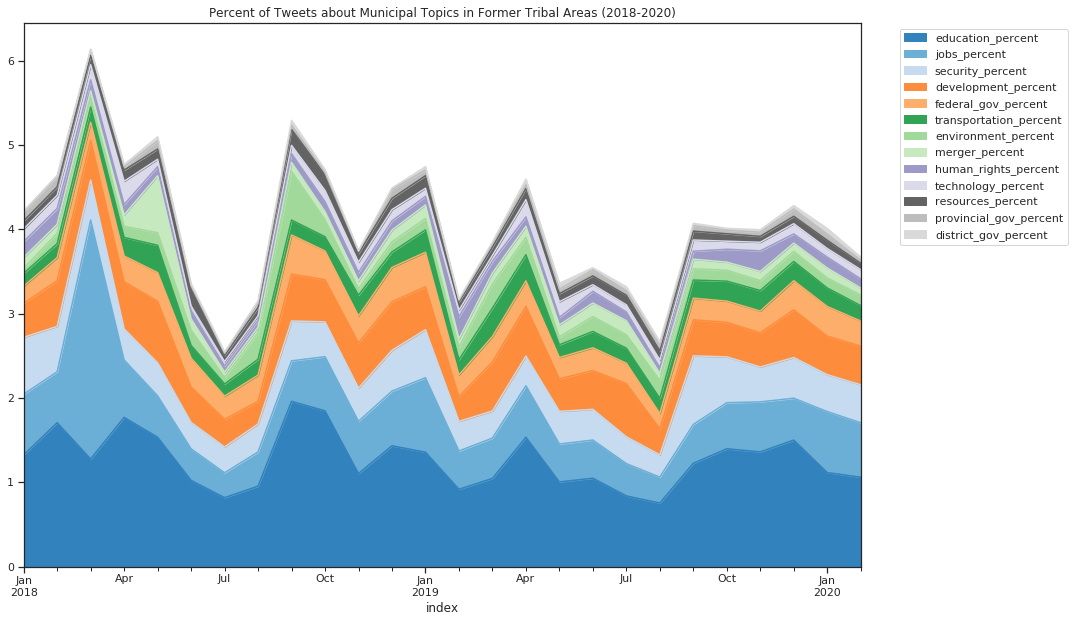

In [298]:
#Plot the distribution of subtopics over time
plt.get_cmap(name="tab20c", lut=None)
by_datetime_percent.plot.area(figsize = [15,10], title="Percent of Tweets about Municipal Topics in Former Tribal Areas (2018-2020)", colormap="tab20c")

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.savefig("Percent of Tweets about Municipal Topics in Former Tribal Areas (2018-2020)", dpi=300, bbox_inches ="tight", transparent=True)

In [415]:
#Create a sentiment distribution over total tweets by removing un-scored tweets
total_tweets_sent = total_tweets[total_tweets["hedonometer"] != 0]

In [416]:
#Determine median sentiment over all tweets in order to calculate relatively high and low sentiment tweets
total_tweets_sent["hedonometer"].describe()

count    6.490791e+06
mean     5.508165e+00
std      4.992199e-01
min      1.300000e+00
25%      5.241818e+00
50%      5.480000e+00
75%      5.732727e+00
max      8.500000e+00
Name: hedonometer, dtype: float64

In [523]:
#Get the sum of value counts of each sub-topic of tweets and find its relative percent to the total in the topic
percents = tweets[tweets["hedonometer"]!=0]
percents = percents["category"].value_counts()
percents = pd.DataFrame(percents)
percents.sum()
percents["percent"] = percents["category"].apply(lambda x: (x/171067)*100)

In [524]:
#Save as a dataframe with sub topics and their percents
percents = percents.reset_index()
percents.columns = ["category", "count", "percent"]
percents = percents[["category", "percent"]]

In [529]:
#Create a dataframe of tweets in this topic with sentiment not equal to zero and sub topic not equal to None
sent = tweets[tweets["hedonometer"] != 0]
sent = sent[sent["category"] != "None"]

In [530]:
#Define the median point for sentiment in the kp dataset and assign tweets from sentiment dataframe to low or high
low_sentiment = sent[sent["hedonometer"] <= 5.49]
high_sentiment = sent[sent["hedonometer"] > 5.49]

In [533]:
#Create a count of low sentiment tweets by sub topic and merge with the percent of the sub topic in the topic dataframe and generate a count of all low-sentiment tweets
low_sentiment["count"] = 1
low_sentiment = low_sentiment[["category", "count"]]
low_sentiment = low_sentiment.groupby(["category"]).sum()
low_sentiment = low_sentiment.reset_index()

low_sentiment = low_sentiment.merge(percents, left_on = "category", right_on = "category")

low_sentiment["count"].sum()


86487

In [534]:
#Calculate the percent difference for each low sentiment sub category compared to the median for the data and sort values
for i, row in low_sentiment.iterrows():
    low_sentiment.at[i,'low_percent'] = (low_sentiment.at[i,'count'] / 86487)*100

low_sentiment["percent_difference"] = low_sentiment["low_percent"] - low_sentiment["percent"]

low_sentiment_plot = low_sentiment[low_sentiment["percent_difference"]>0]

low_sentiment_plot = low_sentiment_plot.set_index("category")
low_sentiment_plot = low_sentiment_plot[["percent_difference"]]
low_sentiment_plot = low_sentiment_plot.sort_values(by='percent_difference', ascending=False)


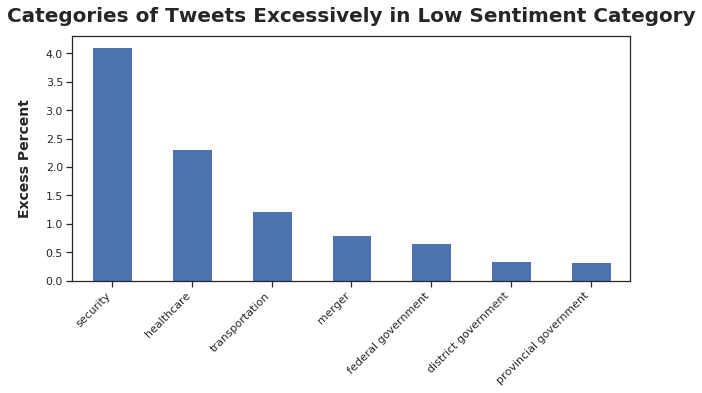

In [536]:
#Plot low sentiment categories
with sns.axes_style("white"):
    sns.set_style("ticks")

    fig,ax = plt.subplots(figsize=(10,5))
    data_to_plot=low_sentiment_plot
    data_to_plot.plot(ax=ax,kind='bar')
    ax.set_ylabel('Excess Percent',fontweight='bold', labelpad = 14, fontsize = 14)
    ax.set_xlabel('',fontweight='bold', labelpad = 14, fontsize = 16)
    ax.tick_params(which='y',direction='in',pad=3)
    ax.tick_params(which='x', labelsize=16, pad=3)
    fig.autofmt_xdate(rotation=45)
    ax.set_title("Categories of Tweets Excessively in Low Sentiment Category", pad = 14, fontweight="bold", fontsize=20)
    ax.get_legend().remove()
    
plt.savefig("Excess Percent of Tweets in Low Sentiment Category KP Municipal Issues", dpi=300, bbox_inches ="tight", transparent = True)

In [537]:
#Create a count of high sentiment tweets by sub topic and merge with the percent of the sub topic in the topic dataframe and generate a count of all high-sentiment tweets
high_sentiment["count"] = 1
high_sentiment = high_sentiment[["category", "count"]]
high_sentiment = high_sentiment.groupby(["category"]).sum()
high_sentiment = high_sentiment.reset_index()

high_sentiment = high_sentiment.merge(percents, left_on = "category", right_on = "category")

high_sentiment["count"].sum()

84580

In [538]:
#Calculate the percent difference for each high sentiment sub category compared to the median for the data and sort values
for i, row in high_sentiment.iterrows():
    high_sentiment.at[i,'high_percent'] = (high_sentiment.at[i,'count'] / 84580)*100

high_sentiment["percent_difference"] = high_sentiment["high_percent"] - high_sentiment["percent"]

high_sentiment_plot = high_sentiment[high_sentiment["percent_difference"]>0]

high_sentiment_plot = high_sentiment_plot.set_index("category")
high_sentiment_plot = high_sentiment_plot[["percent_difference"]]
high_sentiment_plot = high_sentiment_plot.sort_values(by='percent_difference', ascending=False)


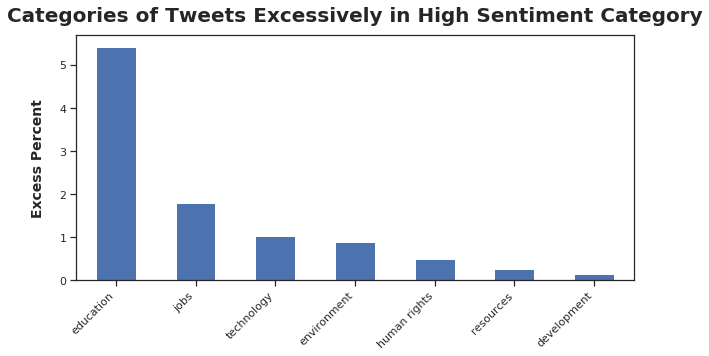

In [540]:
#Plot high sentiment categories
with sns.axes_style("white"):
    sns.set_style("ticks")

    fig,ax = plt.subplots(figsize=(10,5))
    data_to_plot=high_sentiment_plot
    data_to_plot.plot(ax=ax,kind='bar')
    ax.set_ylabel('Excess Percent',fontweight='bold', labelpad = 14, fontsize = 14)
    ax.set_xlabel('',fontweight='bold', labelpad = 14, fontsize = 16)
    ax.tick_params(which='y',direction='in',pad=3)
    ax.tick_params(which='x', labelsize=16, pad=3)
    fig.autofmt_xdate(rotation=45)
    ax.set_title("Categories of Tweets Excessively in High Sentiment Category", pad = 14, fontweight="bold", fontsize=20)
    ax.get_legend().remove()
    
plt.savefig("Excess Percent of Tweets in High Sentiment Category KP Municipal Issues", dpi=300, bbox_inches ="tight", transparent = True)

In [115]:
pd.set_option('display.max_colwidth', -1)

In [557]:
#Create a sorted list of Bigrams

#First put all words of all tweets in a list and remove stopwords
all_tweets = tweets['clean_translation'].to_list()

words_in_tweet = [tweet.split() for tweet in all_tweets]
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw]

# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)
bigram_df = pd.DataFrame(bigram_counts.most_common(),
                             columns=['bigram', 'count'])
bigram_df["string"] = bigram_df["bigram"].apply(lambda x: str(x))
bigram_df["words"] = bigram_df["string"].str.replace('[^\w\s]','')

[nltk_data] Downloading package stopwords to /home/dval/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


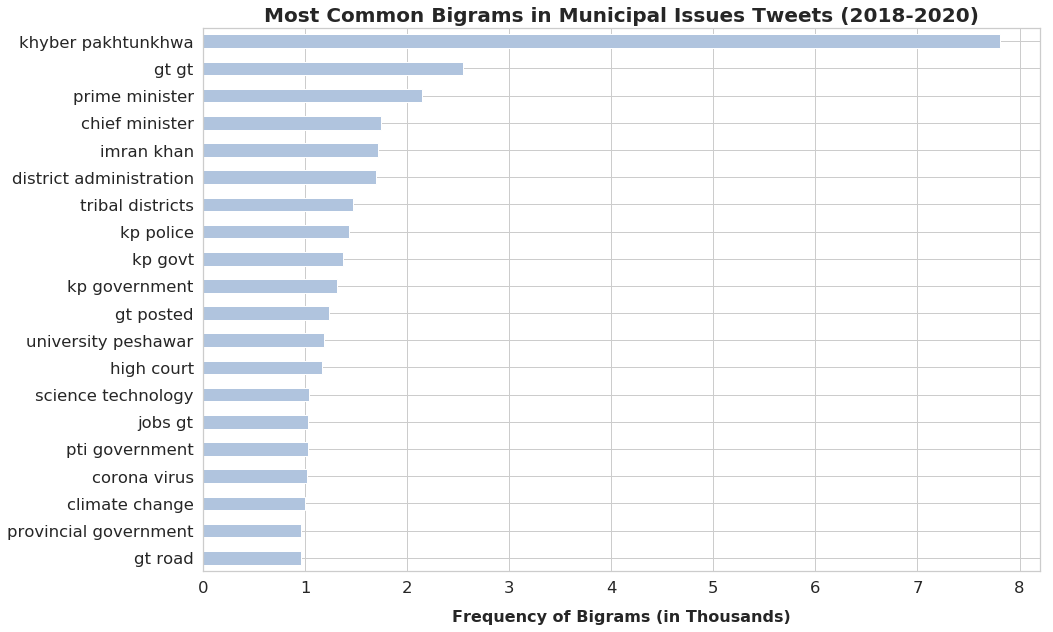

In [571]:
#Plot top bigrams in the topic
bigram_df["count"] = bigram_df["count"]/1000

#Bigrams View
bigram_df = bigram_df.head(20)

#Bigram Plot

fig, ax = plt.subplots(figsize=(15, 10))

# Plot horizontal bar graph
bigram_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="lightsteelblue")

ax.set_title("Most Common Bigrams in Municipal Issues Tweets (2018-2020)", fontweight="bold", fontsize=20)
ax.set_ylabel('',fontweight='bold', labelpad = 14, fontsize = 16)
ax.set_xlabel('Frequency of Bigrams (in Thousands)',fontweight='bold', labelpad = 14, fontsize = 16)
ax.get_legend().remove()
    

plt.savefig("Most Common Bigrams in Municipal Issues Tweets (2018-2020).pdf", dpi=300, bbox_inches ="tight")

In [560]:
#Create a list of word counts in the topic

#First put all words in all tweets into a list
all_tweets = tweets['clean_translation'].to_list()
words_in_tweet = [tweet.split() for tweet in all_tweets]
all_words = list(itertools.chain(*words_in_tweet))

# Create counter
counts = collections.Counter(all_words)
stop_words = nltk.corpus.stopwords.words('english')
stop_words.append("amp")
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]
all_words_nsw = list(itertools.chain(*tweets_nsw))
counts_nsw = collections.Counter(all_words_nsw)

#Return dataframe
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(20),
                             columns=['words', 'count'])

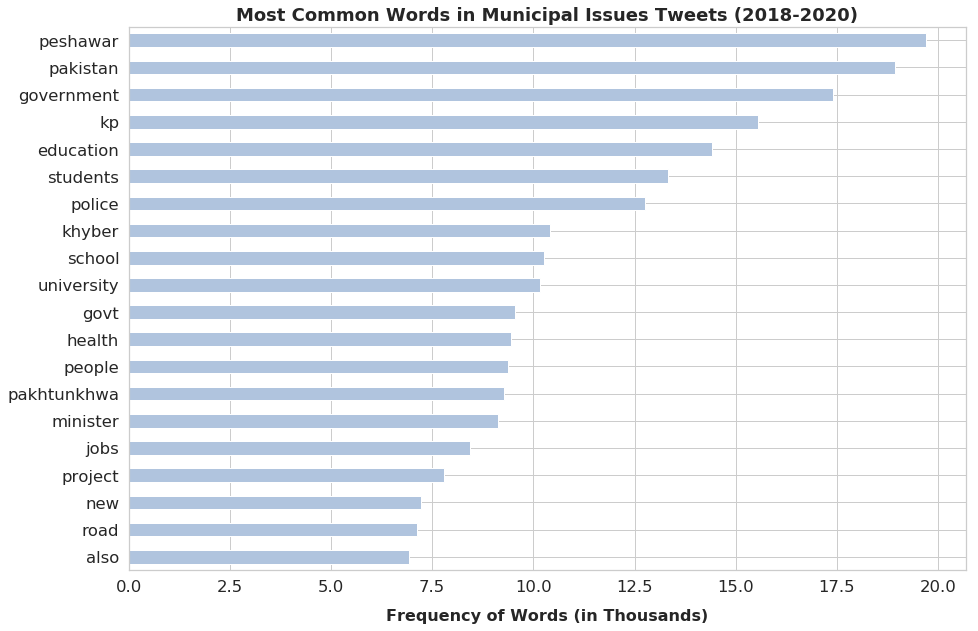

In [572]:
#Plot most frequent words in this topic
clean_tweets_nsw["count"] = clean_tweets_nsw["count"]/1000

fig, ax = plt.subplots(figsize=(15, 10))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="lightsteelblue")

ax.set_title("Most Common Words in Municipal Issues Tweets (2018-2020)", fontweight="bold", fontsize=18)
ax.set_ylabel('',fontweight='bold', labelpad = 14, fontsize = 16)
ax.set_xlabel('Frequency of Words (in Thousands)',fontweight='bold', labelpad = 14, fontsize = 16)
ax.get_legend().remove()
    

plt.savefig("Most Common Words in Municipal Issues Tweets (2018-2020).pdf", dpi=300, bbox_inches ="tight", transparent=True)

In [569]:
#Plot most frequent hashtags in this topic

#first grab hashtags from the dataset and drop empty fields
hashtags = tweets[["hashtags"]]
hashtags = hashtags.dropna()

#Define function to split the sub-lists of hashtags for each tweet and to parallelize the process over multiple cores
def hashtags_only(data):
    return pd.Series(data["hashtags"].str.split(', ').sum()).value_counts()

def parallelize_dataframe(df, func, n_cores=30):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

#Calculate hashtag frequencies and turn into dataframe for plotting
hashtag_frequencies = parallelize_dataframe(hashtags, hashtags_only)
hashtag_df = pd.DataFrame(hashtag_frequencies)
hashtag_df = hashtag_df.reset_index()
hashtag_df.columns = ["hashtag", "count"]
hashtag_plot = hashtag_df.head(20)

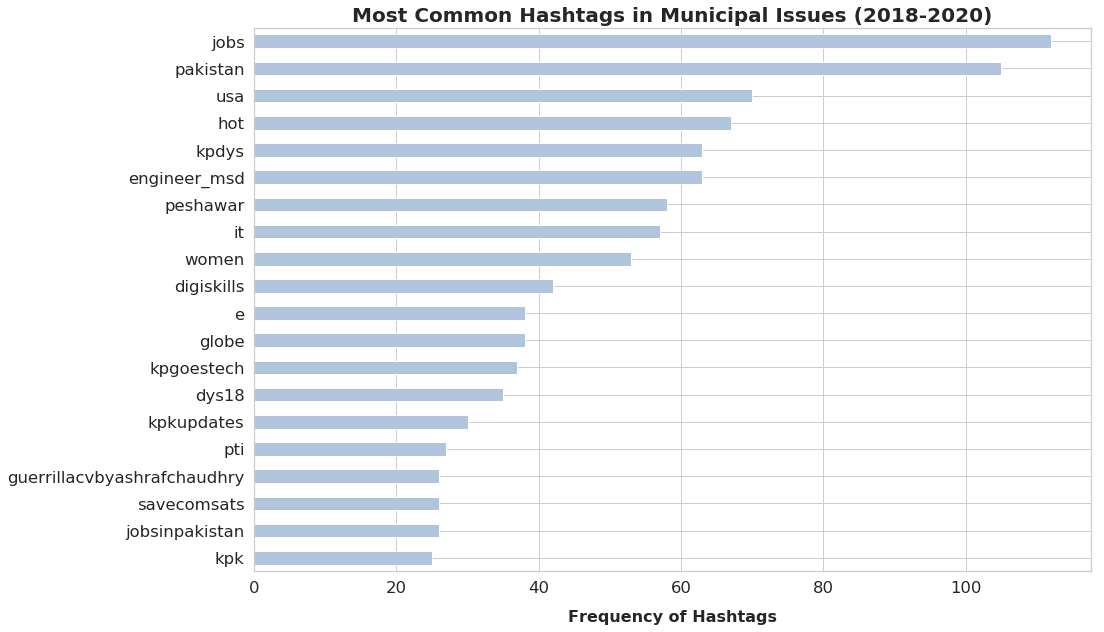

In [573]:
#Plot most frequent hashtags

fig, ax = plt.subplots(figsize=(15, 10))

# Plot horizontal bar graph
hashtag_plot.sort_values(by='count').plot.barh(x='hashtag',
                      y='count',
                      ax=ax,
                      color="lightsteelblue")

ax.set_title("Most Common Hashtags in Municipal Issues (2018-2020)", fontweight="bold", fontsize=20)
ax.set_ylabel('',fontweight='bold', labelpad = 14, fontsize = 16)
ax.set_xlabel('Frequency of Hashtags',fontweight='bold', labelpad = 14, fontsize = 16)
ax.get_legend().remove()
    

plt.savefig("Most Common Hashtags in Municipal Issues (2018-2020).pdf", dpi=300, bbox_inches ="tight")

In [574]:
#Define the cetroid for the shapes in shapefile
pakistan["center"] = pakistan["geometry"].centroid
pakistan_points = pakistan.copy()
pakistan_points.set_geometry("center", inplace = True)

In [575]:
#define number of unique users per location in this topic
location = tweets[["user_id", "user_location"]]
location = location.groupby("user_location").nunique()
location = location.drop(columns=["user_location"])

#define number of unique users per location across all tweets
location_all = total_tweets[["user_id", "user_location"]]
location_all = location_all.groupby("user_location").nunique()
location_all = location_all.drop(columns=["user_location"])

#merge datasets and determine the percent of unique users per location tweeting about this topic
location = location_all.merge(location, left_index = True, right_index = True)
location.columns = ["total", "subset"]
location["percent"] = (location["subset"] / location["total"]) * 100

#read in the shapefile with lowercase place names 
pakistan = gpd.read_file('PAK_adm3.shp')
pakistan = pakistan[["NAME_3", "geometry"]]
pakistan["NAME_3"] = pakistan["NAME_3"].str.lower()

#merge percent of users with shapefile to plot
plot = pakistan.merge(location, how='left', left_on="NAME_3", right_on="user_location")

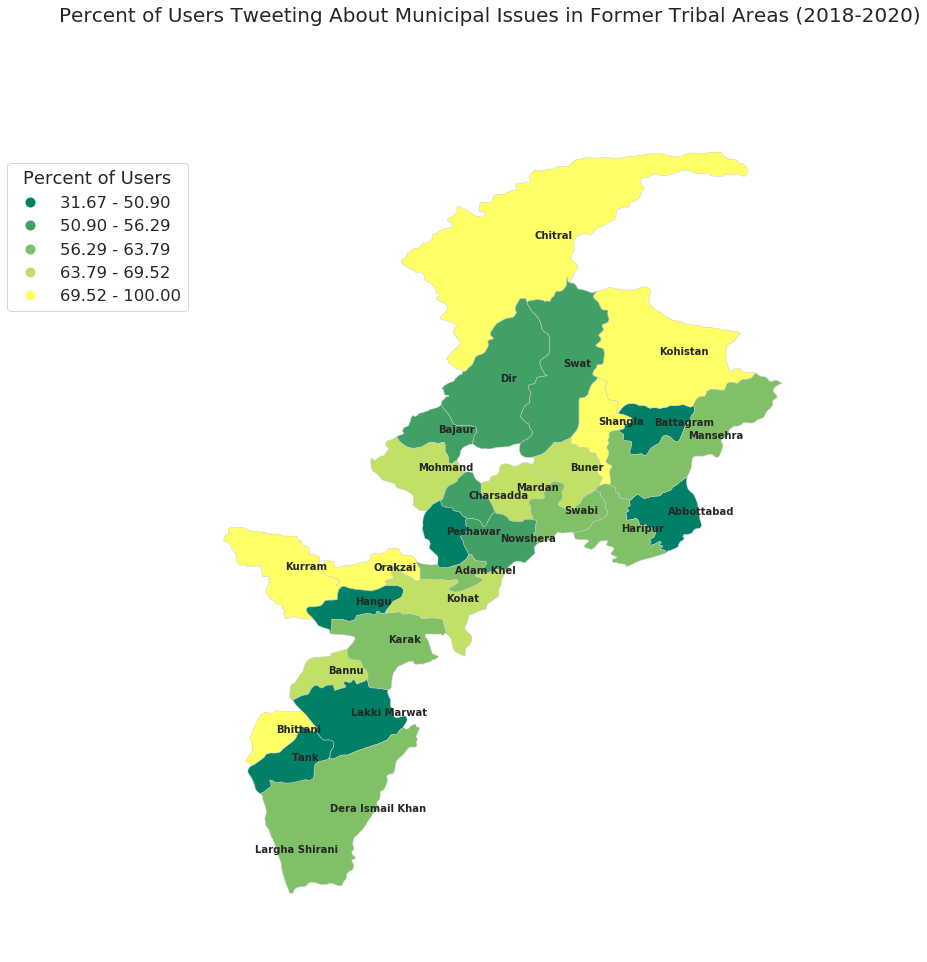

In [576]:
#Plot percent of users tweeting about this topic on map with place names at center
with sns.axes_style("white"):
    sns.set_style("ticks")
    
    fig,ax = plt.subplots(figsize=(15,15))

    data_to_plot=plot[['percent','geometry']].copy()

    fig.suptitle('Percent of Users Tweeting About Municipal Issues in Former Tribal Areas (2018-2020)', fontsize = 20)
    
    texts=[]
    for x, y, label in zip(pakistan_points.geometry.x, pakistan_points.geometry.y, pakistan_points["NAME_3"]):
        texts.append(plt.text(x, y, label, fontsize = 10, fontweight="bold"))
        
    data_to_plot.plot(
    'percent',
    scheme='Quantiles',
    linewidth=0.5, 
    k=5,
    ax=ax, 
    cmap='summer',
    edgecolor='0.8',
    legend="Full",
    legend_kwds={
    'frameon': True, 
    'title': 'Percent of Users',
    'loc': 'lower right',
    'bbox_to_anchor':(0.0002,0.75), 
    'frameon':'False',
    })
    ax.axis('off')
    
    plt.savefig("Percent of Users Tweeting About Municipal Issues in Former Tribal Areas (2018-2020)).pdf", dpi=300, bbox_inches ="tight", transparent = True)

In [83]:
#Create a dataframe with the number of unique users per location 
users = users.groupby(["user_location"]).agg({"user_id":"nunique"})

In [ ]:
#Create a dataframe for each sub-topic with number of unique users tweeting about that subtopic divided by the number of unique users in that place to determine percent of users tweeting about the sub-topic.

In [87]:
education = tweets[tweets["category"] == "education"]
education = education[["user_id", "user_location"]]
education = education.groupby(['user_location']).agg({'user_id': "nunique"})
education = education["user_id"] / users["user_id"] * 100
education = pd.DataFrame(education)
education.columns = ["education"]

In [89]:
jobs = tweets[tweets["category"] == "jobs"]
jobs = jobs[["user_id", "user_location"]]
jobs = jobs.groupby(['user_location']).agg({'user_id': "nunique"})
jobs = jobs["user_id"] / users["user_id"] * 100
jobs = pd.DataFrame(jobs)
jobs.columns = ["jobs"]


In [90]:
security = tweets[tweets["category"] == "security"]
security = security[["user_id", "user_location"]]
security = security.groupby(['user_location']).agg({'user_id': "nunique"})
security = security["user_id"] / users["user_id"] * 100
security = pd.DataFrame(security)
security.columns = ["security"]


In [91]:
development = tweets[tweets["category"] == "development"]
development = development[["user_id", "user_location"]]
development = development.groupby(['user_location']).agg({'user_id': "nunique"})
development = development["user_id"] / users["user_id"] * 100
development = pd.DataFrame(development)
development.columns = ["development"]


In [92]:
federal_gov = tweets[tweets["category"] == "federal government"]
federal_gov = federal_gov[["user_id", "user_location"]]
federal_gov = federal_gov.groupby(['user_location']).agg({'user_id': "nunique"})
federal_gov = federal_gov["user_id"] / users["user_id"] * 100
federal_gov = pd.DataFrame(federal_gov)
federal_gov.columns = ["federal_gov"]


In [93]:
transportation = tweets[tweets["category"] == "transportation"]
transportation = transportation[["user_id", "user_location"]]
transportation = transportation.groupby(['user_location']).agg({'user_id': "nunique"})
transportation = transportation["user_id"] / users["user_id"] * 100
transportation = pd.DataFrame(transportation)
transportation.columns = ["transportation"]


In [94]:
environment = tweets[tweets["category"] == "environment"]
environment = environment[["user_id", "user_location"]]
environment = environment.groupby(['user_location']).agg({'user_id': "nunique"})
environment = environment["user_id"] / users["user_id"] * 100
environment = pd.DataFrame(environment)
environment.columns = ["environment"]


In [95]:
merger = tweets[tweets["category"] == "merger"]
merger = merger[["user_id", "user_location"]]
merger = merger.groupby(['user_location']).agg({'user_id': "nunique"})
merger = merger["user_id"] / users["user_id"] * 100
merger = pd.DataFrame(merger)
merger.columns = ["merger"]


In [96]:
human_rights = tweets[tweets["category"] == "human rights"]
human_rights = human_rights[["user_id", "user_location"]]
human_rights = human_rights.groupby(['user_location']).agg({'user_id': "nunique"})
human_rights = human_rights["user_id"] / users["user_id"] * 100
human_rights = pd.DataFrame(human_rights)
human_rights.columns = ["human_rights"]


In [97]:
technology = tweets[tweets["category"] == "technology"]
technology = technology[["user_id", "user_location"]]
technology = technology.groupby(['user_location']).agg({'user_id': "nunique"})
technology = technology["user_id"] / users["user_id"] * 100
technology = pd.DataFrame(technology)
technology.columns = ["technology"]


In [98]:
resources = tweets[tweets["category"] == "resources"]
resources = resources[["user_id", "user_location"]]
resources = resources.groupby(['user_location']).agg({'user_id': "nunique"})
resources = resources["user_id"] / users["user_id"] * 100
resources = pd.DataFrame(resources)
resources.columns = ["resources"]


In [99]:
provincial_gov = tweets[tweets["category"] == "provincial government"]
provincial_gov = provincial_gov[["user_id", "user_location"]]
provincial_gov = provincial_gov.groupby(['user_location']).agg({'user_id': "nunique"})
provincial_gov = provincial_gov["user_id"] / users["user_id"] * 100
provincial_gov = pd.DataFrame(provincial_gov)
provincial_gov.columns = ["provincial_gov"]


In [100]:
district_gov = tweets[tweets["category"] == "district government"]
district_gov = district_gov[["user_id", "user_location"]]
district_gov = district_gov.groupby(['user_location']).agg({'user_id': "nunique"})
district_gov = district_gov["user_id"] / users["user_id"] * 100
district_gov = pd.DataFrame(district_gov)
district_gov.columns = ["district_gov"]


In [ ]:
#Merge all subtopic dataframes

In [102]:
one = education.merge(jobs, left_index=True, right_index = True)
two = security.merge(development, left_index=True, right_index=True)
three = federal_gov.merge(transportation, left_index=True, right_index=True)
four = environment.merge(merger, left_index=True, right_index=True)
five = human_rights.merge(technology, left_index=True, right_index=True)
five = resources.merge(provincial_gov, left_index=True, right_index=True)
six = district_gov

one = one.merge(two, left_index=True, right_index=True)
two = three.merge(four, left_index=True, right_index=True)
three = five.merge(six, left_index=True, right_index=True)

one = one.merge(two, left_index=True, right_index=True)
df_plot = one.merge(three, left_index=True, right_index=True)

In [103]:
#Sort places by the sum total of the unique users tweeting about each sub topic for plotting
df_plot["sum"] = df_plot.sum(axis=1)
df_plot = df_plot.sort_values("sum", ascending=False)
df_plot = df_plot.drop(columns=["sum"])

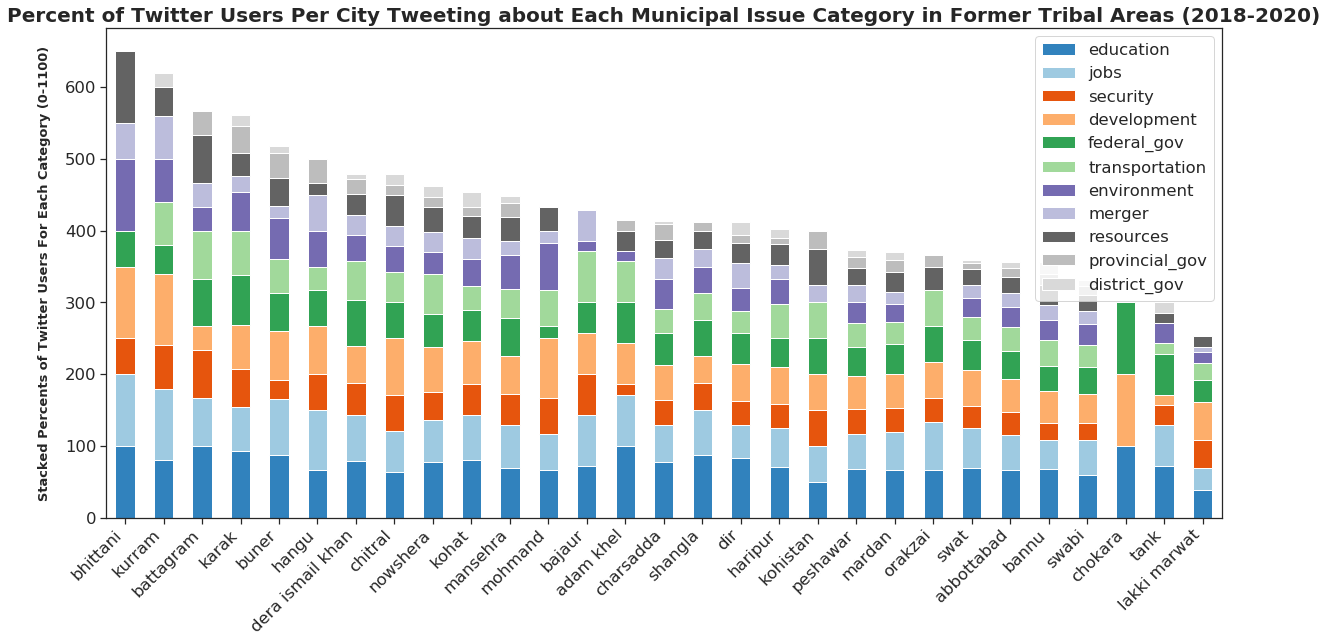

In [108]:
#Plot percent of unique users tweeting about each sub-topic per location 
with sns.axes_style("white"):
    sns.set_style("ticks")

    fig,ax = plt.subplots(figsize=(20,10))
    data_to_plot=df_plot
    data_to_plot.plot(ax=ax,kind='bar', stacked=True, colormap="tab20c")
    ax.set_ylabel('Stacked Percents of Twitter Users For Each Category (0-1100)',fontweight='bold', labelpad = 14, fontsize = 13)
    ax.set_xlabel('',fontweight='bold', labelpad = 14, fontsize = 20)
    ax.tick_params(which='y',direction='in',pad=3)
    ax.tick_params(which='x', labelsize=16, pad=3)
    fig.autofmt_xdate(rotation=45)
    ax.set_title("Percent of Twitter Users Per City Tweeting about Each Municipal Issue Category in Former Tribal Areas (2018-2020)", fontweight="bold", fontsize=20)
    
    plt.savefig("Percent of Twitter Users Per City Tweeting about Each Municipal Issue Category in Former Tribal Areas (2018-2020)", dpi=300, bbox_inches ="tight")